# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


# Solution
On the CIFAR-10 dataset, which consists of 60,000 32x32 color pictures organized into 10 classes with 6,000 images each, we want to do manifold learning. Finding a lower-dimensional representation of the high-dimensional data that retains the links and structure between the data points is the aim of manifold learning.

In [6]:
#Ignoring all warning
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Importing libraries
import numpy as np
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import umap
from umap.umap_ import UMAP

In [63]:
#install libraries
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Basic EDA


In [54]:
# Loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [55]:
# Printing shape of training data
print(f"Shape of training data: {X_train.shape}, {y_train.shape}")

# Printing shape of test data
print(f"Shape of test data: {X_test.shape}, {y_test.shape}")


Shape of training data: (50000, 32, 32, 3), (50000, 1)
Shape of test data: (10000, 32, 32, 3), (10000, 1)


Training Images and Labels


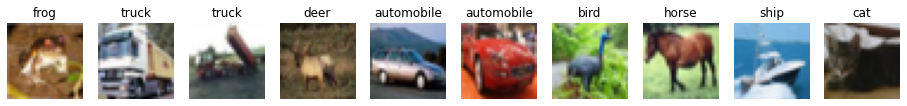

In [56]:

cf_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_examples = 10

# Printing example training images and their labels
print(f"Training Images and Labels")

# Ploting example training images
fig, axes = plt.subplots(1, num_examples, figsize=(16, 6))
for i in range(num_examples):
    img = X_train[i]
    axes[i].imshow(img)
    axes[i].set_title(cf_classes[y_train[i][0]])
    axes[i].axis('off')
plt.show()

## Preprocessing
Now,  preprocessesing the data by converting the label indices to one-hot encoded vectors using the OneHotEncoder class from scikit-learn. Then flattening images from (32,32,3) to 3072-dimensional vectors using the reshape() method, and then converting pixel values to float32 and normalized to the [0-1] range.

In [57]:
# Converting label indices to one-hot encoded vectors
encoderImages = OneHotEncoder(categories='auto')


In [58]:
#encoding training and testing data
y_train = encoderImages.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoderImages.transform(y_test.reshape(-1, 1)).toarray()

In [59]:
# Flattening images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

In [60]:
# Converting pixel values to float32 and normalize to [0-1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [61]:
# Printing shape of training data
print(f"Shape of training data: {X_train.shape}, {y_train.shape}")

# Printing shape of test data
print(f"Shape of test data: {X_test.shape}, {y_test.shape}")

Shape of training data: (50000, 3072), (50000, 10)
Shape of test data: (10000, 3072), (10000, 10)


## Manifold Learning Algorithms

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

In [68]:
# Defining manifold learning algorithms to compare
manifold_algorithms = [
    ('PCA', PCA(n_components=2)),
    ('Isomap', Isomap(n_components=2)),
    ('LLE', LocallyLinearEmbedding(n_components=2)),
    ('MDS', MDS(n_components=2)),
    ('SE', SpectralEmbedding(n_components=2)),
    ('t-SNE', TSNE(n_components=2, perplexity=30)),
    ('UMAP', UMAP(n_components=2, random_state=42))
]

Matplotlib is used to plot the outcomes of the manifold learning. The lower-dimensional representation of the data is computed for each algorithm using the fit_transform() method, and the first 1000 training samples are utilized for this. Using the scatter() function of matplotlib, the resulting 2D data is displayed, and each point is colored using the cmap argument in accordance with its true class label. For the plot's class labels to appear, use the legend() method.

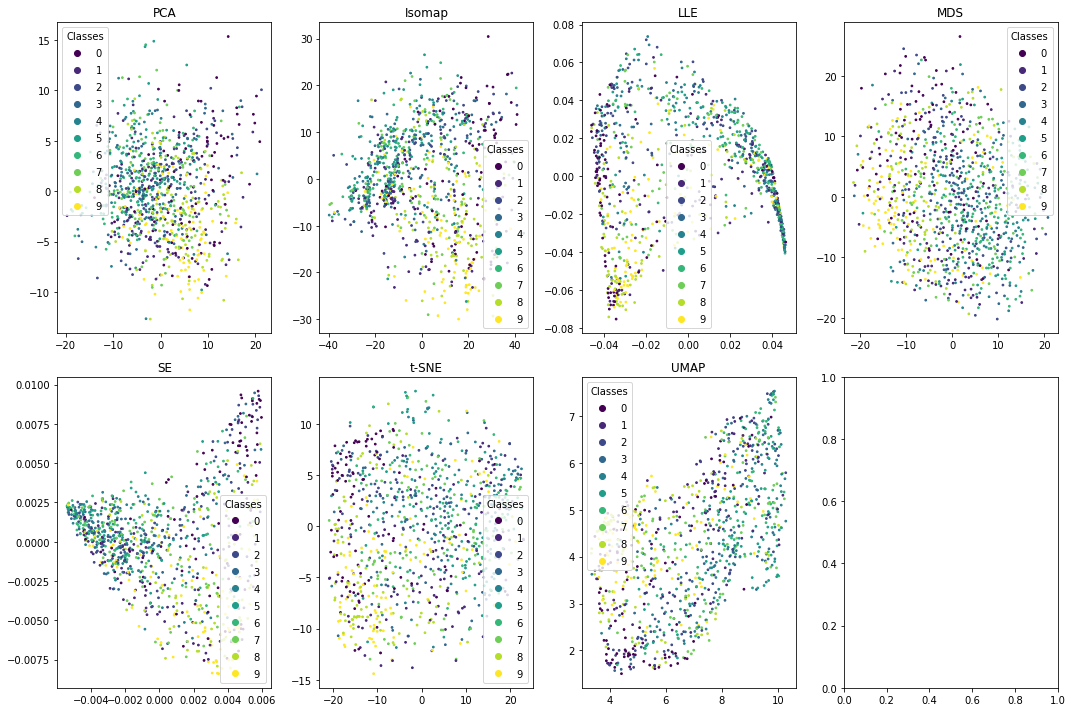

In [70]:
# Plot the manifold results
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.ravel()

for i, (name, algo) in enumerate(manifold_algorithms):
    X_manifold = algo.fit_transform(X_train[:1000])
    scatter = axs[i].scatter(X_manifold[:, 0], 
                             X_manifold[:, 1], 
                             c=y_train.argmax(axis=1)[:1000], 
                             s=3, 
                             cmap='viridis', 
                             label=y_train[:1000].argmax(axis=1)[:1000])
    axs[i].set_title(name)
    axs[i].legend(*scatter.legend_elements(), loc="best", title="Classes")

plt.tight_layout()
plt.show()

The plot's points each represent an individual image, and each point's color designates its class. Each plot's legend lists the class designations and the associated colors.

Overall, the graphic offers a visual comparison of how well various manifold learning techniques preserve the CIFAR-10 dataset's underlying structure. The stronger distinction between the various colors of dots in certain plots compared to others shows that some algorithms are more effective at classifying the data than others.
